In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: April 2025
# License: MIT

In [2]:
import matplotlib.pyplot as plt
import numpy as np

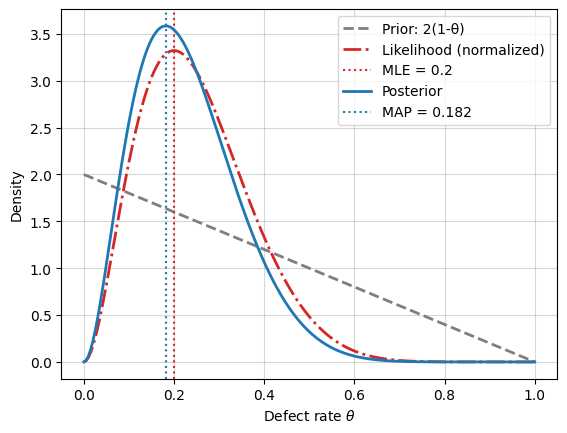

In [29]:
from scipy.stats import beta

# Grid of theta values
theta = np.linspace(0, 1, 200)

# Prior: p(theta) = 2(1-theta), corresponds to Beta(1, 2)
prior_pdf = beta.pdf(theta, 1, 2)

# Likelihood (up to proportionality): theta^2 (1-theta)^8
likelihood_unnorm = (theta**2) * ((1 - theta)**8)

# Normalize likelihood for plotting (so its area is 1)
likelihood_pdf = likelihood_unnorm / np.trapz(likelihood_unnorm, theta)

# Posterior: proportional to theta^2 (1-theta)^9, corresponds to Beta(3, 10)
posterior_pdf = beta.pdf(theta, 3, 10)

# MAP and MLE
theta_map = 2 / 11
theta_mle = 2 / 10

# Plot
plt.plot(theta, prior_pdf, label='Prior: 2(1-θ)', color='tab:gray', linestyle='--', linewidth=2)
plt.plot(theta, likelihood_pdf, label='Likelihood (normalized)', color='tab:red', linestyle='-.', linewidth=2)
plt.axvline(theta_mle, color='tab:red', linestyle=':', linewidth=1.5, label=f'MLE = {theta_mle}')

plt.plot(theta, posterior_pdf, label='Posterior', color='tab:blue', linewidth=2)
plt.axvline(theta_map, color='tab:blue', linestyle=':', linewidth=1.5, label=f'MAP = {theta_map:.3f}')

plt.xlabel('Defect rate $θ$')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('figures/maximum_a_posteriori.pdf')